In [162]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
#import ace_tools as tools

# Import and Inspect data

In [163]:
# import .csv data
file_path = '/Users/ultraronachart/Documents/Machine Learning I/Final Project/online_gaming_behavior_dataset.csv'

df = pd.read_csv(file_path)

In [164]:
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [165]:
# Type of the data
type(df)

pandas.core.frame.DataFrame

In [166]:
# View basic data info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [167]:
# View the descriptive stat of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PlayerID,40034.0,29016.500000,11556.964675,9000.000000,19008.250000,29016.500000,39024.750000,49033.000000
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


# EDA

In [168]:
### Check unique value counts and the percentage of the object variables.

# Loop through object (categorical) columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    
    # Get value counts
    counts = df[col].value_counts(dropna=False)

    # Calculate percentage
    percentages = (counts / counts.sum()) * 100

    # Combine into a DataFrame 
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    }).reset_index()

    summary.columns = [col, 'Count', 'Percentage']

    # Display
    print(summary.to_string(index=False))


Column: Gender
Gender  Count  Percentage
  Male  23959    59.84663
Female  16075    40.15337

Column: Location
Location  Count  Percentage
     USA  16000   39.966029
  Europe  12004   29.984513
    Asia   8095   20.220313
   Other   3935    9.829145

Column: GameGenre
 GameGenre  Count  Percentage
    Sports   8048   20.102913
    Action   8039   20.080432
  Strategy   8012   20.012989
Simulation   7983   19.940551
       RPG   7952   19.863116

Column: GameDifficulty
GameDifficulty  Count  Percentage
          Easy  20015   49.995004
        Medium  12011   30.001998
          Hard   8008   20.002997

Column: EngagementLevel
EngagementLevel  Count  Percentage
         Medium  19374   48.393865
           High  10336   25.818055
            Low  10324   25.788080


In [169]:
df['InGamePurchases'].value_counts()

InGamePurchases
0    31993
1     8041
Name: count, dtype: int64

In [170]:
# Crosstab of EngagementLevel with Gender (each column sums to 100%)
ct_percentage = pd.crosstab(df['EngagementLevel'], 
                             df['Gender'], 
                             normalize='columns') * 100

print(ct_percentage)

Gender              Female       Male
EngagementLevel                      
High             26.102644  25.627113
Low              25.636081  25.890062
Medium           48.261275  48.482825


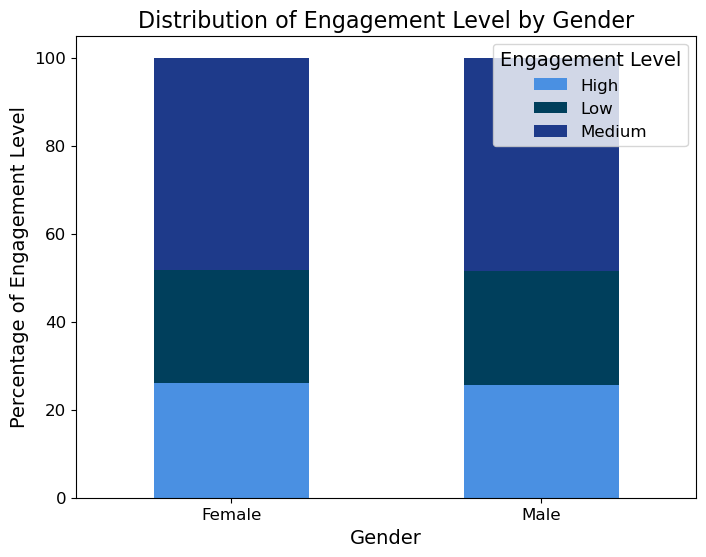

In [171]:
# Define more distinct shades of blue and navy for better contrast
colors = ["#4A90E2", "#003f5c", "#1E3A8A"]  # Lighter blue, navy blue, deep blue

# Plot stacked bar chart with enhanced blue/navy colors
ax = ct_percentage.T.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)

# Increase text size for labels, title, and legend
plt.ylabel("Percentage of Engagement Level", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.title("Distribution of Engagement Level by Gender", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show legend with larger font size
plt.legend(title="Engagement Level", loc="upper right", fontsize=12, title_fontsize=14)

# Improve visibility
plt.xticks(rotation=0)  # Keep gender labels horizontal for readability

# Show the plot
plt.show()


In [172]:
# Crosstab of EngagementLevel with Location (each column sums to 100%)
ct_percentage = pd.crosstab(df['EngagementLevel'], 
                             df['Location'], 
                             normalize='columns') * 100

print(ct_percentage)

Location              Asia     Europe      Other       USA
EngagementLevel                                           
High             26.324892  25.558147  25.667090  25.79375
Low              25.423101  26.182939  26.327827  25.54375
Medium           48.252007  48.258914  48.005083  48.66250


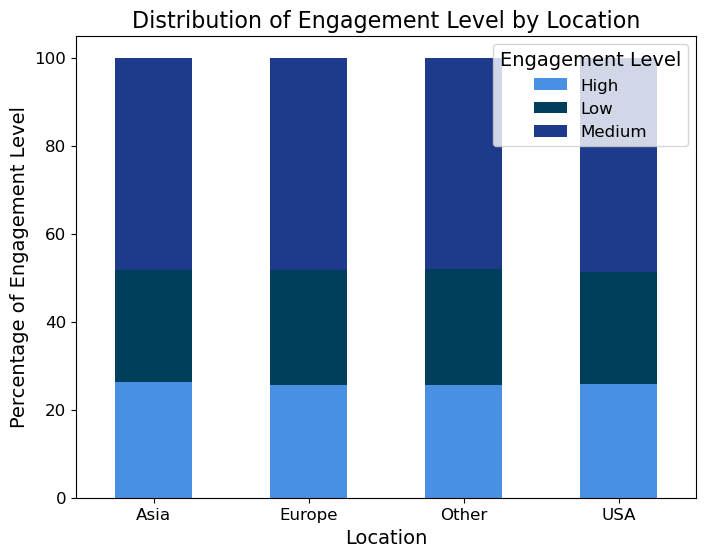

In [173]:
# Define more distinct shades of blue and navy for better contrast
colors = ["#4A90E2", "#003f5c", "#1E3A8A"]  # Lighter blue, navy blue, deep blue

# Plot stacked bar chart with enhanced blue/navy colors
ax = ct_percentage.T.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)

# Increase text size for labels, title, and legend
plt.ylabel("Percentage of Engagement Level", fontsize=14)
plt.xlabel("Location", fontsize=14)
plt.title("Distribution of Engagement Level by Location", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show legend with larger font size
plt.legend(title="Engagement Level", loc="upper right", fontsize=12, title_fontsize=14)

# Improve visibility
plt.xticks(rotation=0)  # Keep gender labels horizontal for readability

# Show the plot
plt.show()

In [174]:
# Crosstab of EngagementLevel with Game Genre (each column sums to 100%)
ct_percentage = pd.crosstab(df['EngagementLevel'], 
                             df['GameGenre'], 
                             normalize='columns') * 100

print(ct_percentage)

GameGenre           Action        RPG  Simulation     Sports   Strategy
EngagementLevel                                                        
High             25.674835  25.000000   26.356007  25.882207  26.173240
Low              25.612638  26.370724   26.155581  25.770378  25.037444
Medium           48.712526  48.629276   47.488413  48.347416  48.789316


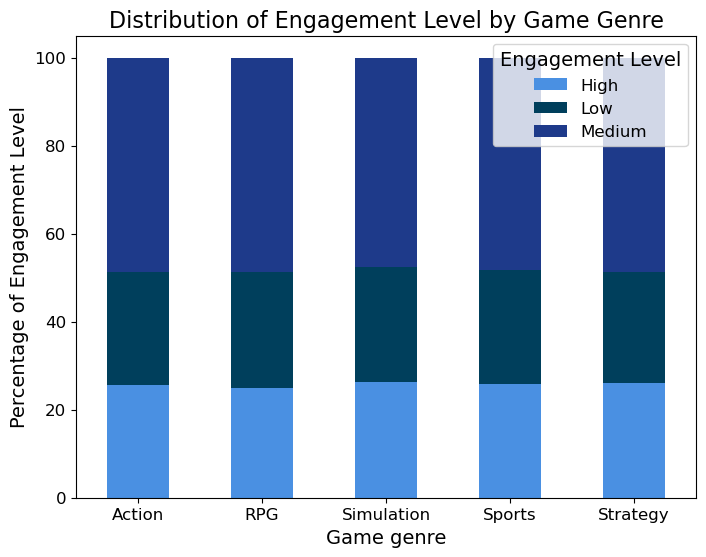

In [175]:
# Define more distinct shades of blue and navy for better contrast
colors = ["#4A90E2", "#003f5c", "#1E3A8A"]  # Lighter blue, navy blue, deep blue

# Plot stacked bar chart with enhanced blue/navy colors
ax = ct_percentage.T.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)

# Increase text size for labels, title, and legend
plt.ylabel("Percentage of Engagement Level", fontsize=14)
plt.xlabel("Game genre", fontsize=14)
plt.title("Distribution of Engagement Level by Game Genre", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show legend with larger font size
plt.legend(title="Engagement Level", loc="upper right", fontsize=12, title_fontsize=14)

# Improve visibility
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [176]:
# Crosstab of EngagementLevel with in-app purchare (each column sums to 100%)
ct_percentage = pd.crosstab(df['EngagementLevel'], 
                             df['InGamePurchases'], 
                             normalize='columns') * 100

print(ct_percentage)

InGamePurchases          0          1
EngagementLevel                      
High             25.636858  26.538988
Low              25.902541  25.332670
Medium           48.460601  48.128342


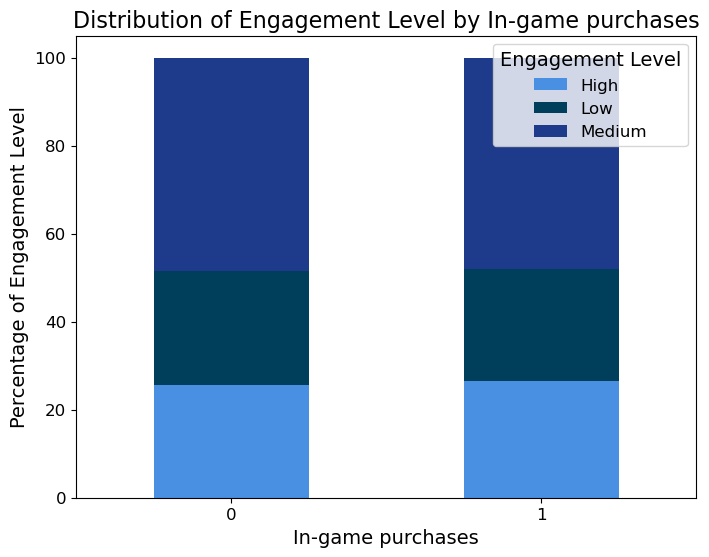

In [177]:
# Define more distinct shades of blue and navy for better contrast
colors = ["#4A90E2", "#003f5c", "#1E3A8A"]  # Lighter blue, navy blue, deep blue

# Plot stacked bar chart with enhanced blue/navy colors
ax = ct_percentage.T.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)

# Increase text size for labels, title, and legend
plt.ylabel("Percentage of Engagement Level", fontsize=14)
plt.xlabel("In-game purchases", fontsize=14)
plt.title("Distribution of Engagement Level by In-game purchases", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show legend with larger font size
plt.legend(title="Engagement Level", loc="upper right", fontsize=12, title_fontsize=14)

# Improve visibility
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [178]:
# Crosstab of EngagementLevel with Game difficulty (each column sums to 100%)
ct_percentage = pd.crosstab(df['EngagementLevel'], 
                             df['GameDifficulty'], 
                             normalize='columns') * 100

print(ct_percentage)

GameDifficulty        Easy       Hard     Medium
EngagementLevel                                 
High             25.640769  26.373626  25.743069
Low              26.010492  25.924076  25.326784
Medium           48.348738  47.702298  48.930147


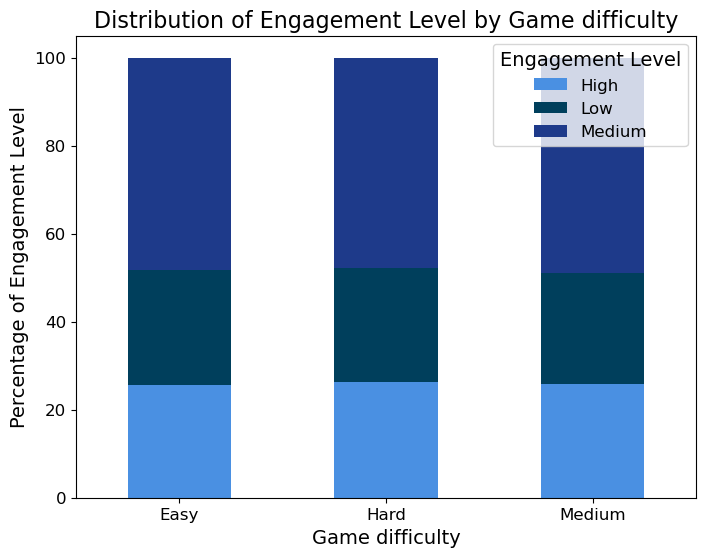

In [179]:
# Define more distinct shades of blue and navy for better contrast
colors = ["#4A90E2", "#003f5c", "#1E3A8A"]  # Lighter blue, navy blue, deep blue

# Plot stacked bar chart with enhanced blue/navy colors
ax = ct_percentage.T.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)

# Increase text size for labels, title, and legend
plt.ylabel("Percentage of Engagement Level", fontsize=14)
plt.xlabel("Game difficulty", fontsize=14)
plt.title("Distribution of Engagement Level by Game difficulty", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show legend with larger font size
plt.legend(title="Engagement Level", loc="upper right", fontsize=12, title_fontsize=14)

# Improve visibility
plt.xticks(rotation=0)

# Show the plot
plt.show()

Text(0.5, 1.0, 'Age distribution')

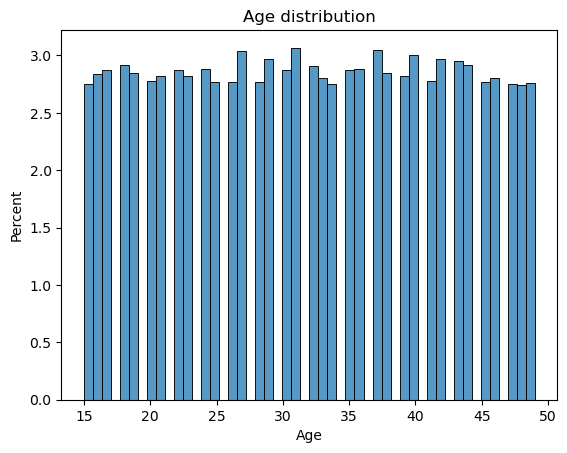

In [180]:
# Age distribution
sns.histplot(df['Age'], stat = 'percent',bins=50)
plt.title('Age distribution')

Text(0.5, 1.0, 'Play Time Hours distribution')

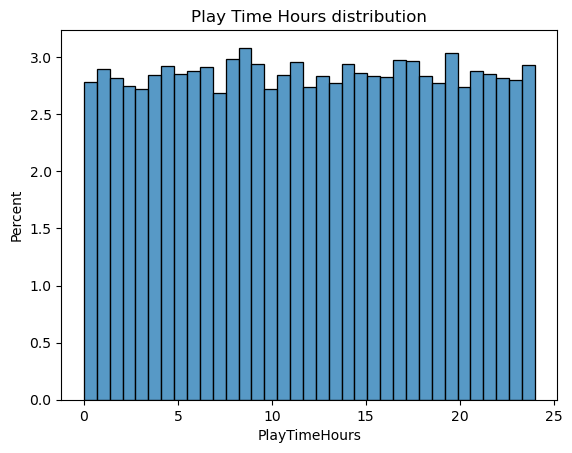

In [181]:
# Playing time distribution
sns.histplot(df['PlayTimeHours'], stat = 'percent')
plt.title('Play Time Hours distribution')

Text(0.5, 1.0, 'Distribution of Session per week')

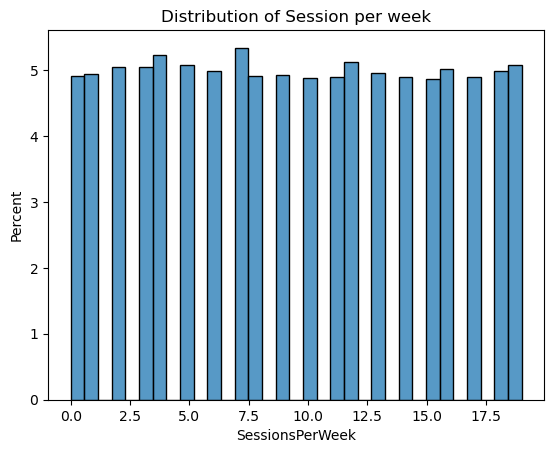

In [182]:
# Session per week distribution
sns.histplot(df['SessionsPerWeek'], stat='percent')
plt.title('Distribution of Session per week')

Text(0.5, 1.0, 'Distribution of Avg Session Duration in Minutes')

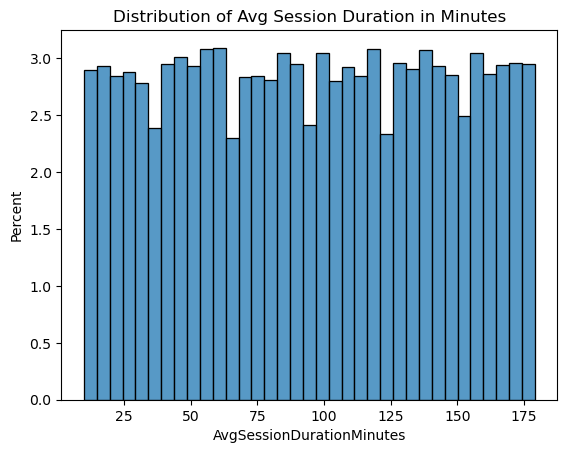

In [183]:
# AvgSessionDurationMinutes distribution
sns.histplot(df['AvgSessionDurationMinutes'], stat='percent')
plt.title('Distribution of Avg Session Duration in Minutes')

Text(0.5, 1.0, 'Distribution of Player Level')

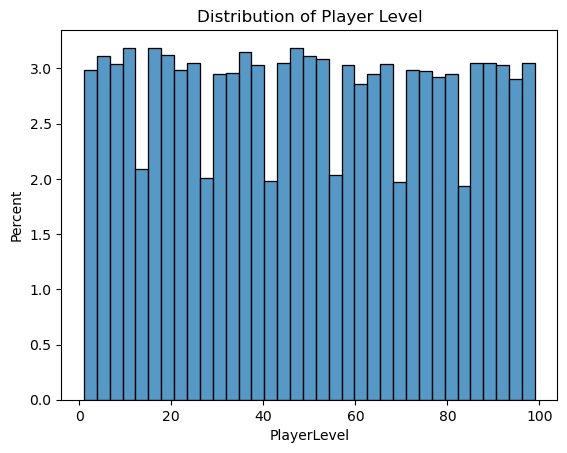

In [184]:
# Player Level distribution
sns.histplot(df['PlayerLevel'], stat='percent')
plt.title('Distribution of Player Level')

Text(0.5, 1.0, 'Distribution of Achievement Unlock')

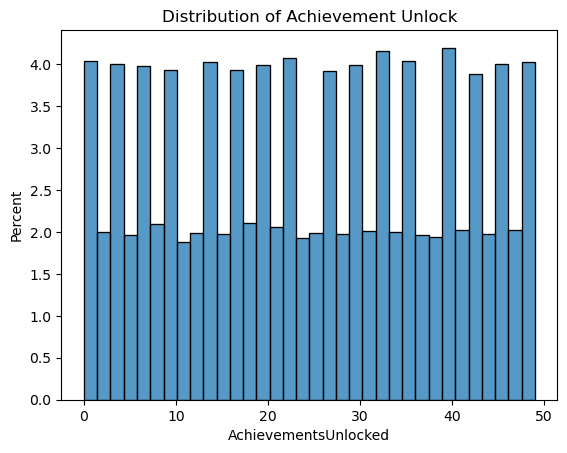

In [185]:
# Achievement Unlock distribution
sns.histplot(df['AchievementsUnlocked'], stat='percent')
plt.title('Distribution of Achievement Unlock')

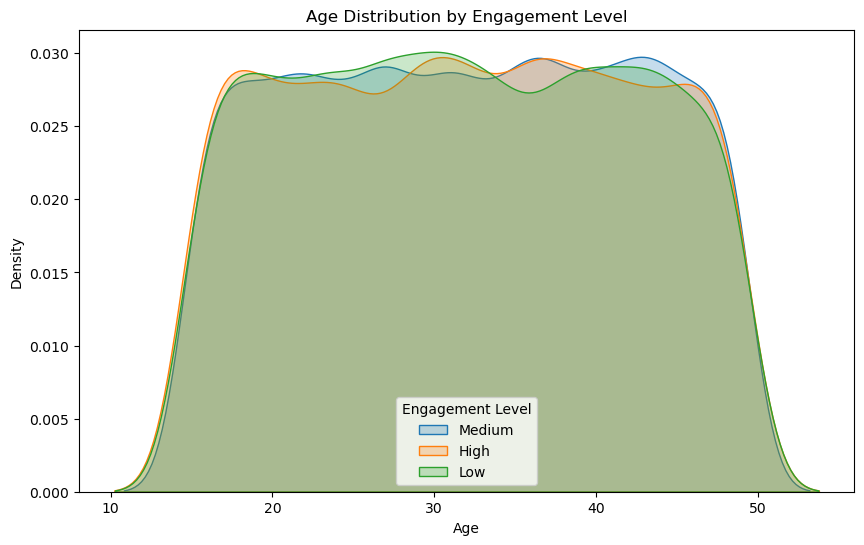

In [186]:
plt.figure(figsize=(10, 6))
for level in df['EngagementLevel'].unique():
    subset = df[df['EngagementLevel'] == level]
    sns.kdeplot(subset['Age'], label=level, fill=True)

plt.title('Age Distribution by Engagement Level')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Engagement Level')
plt.show()

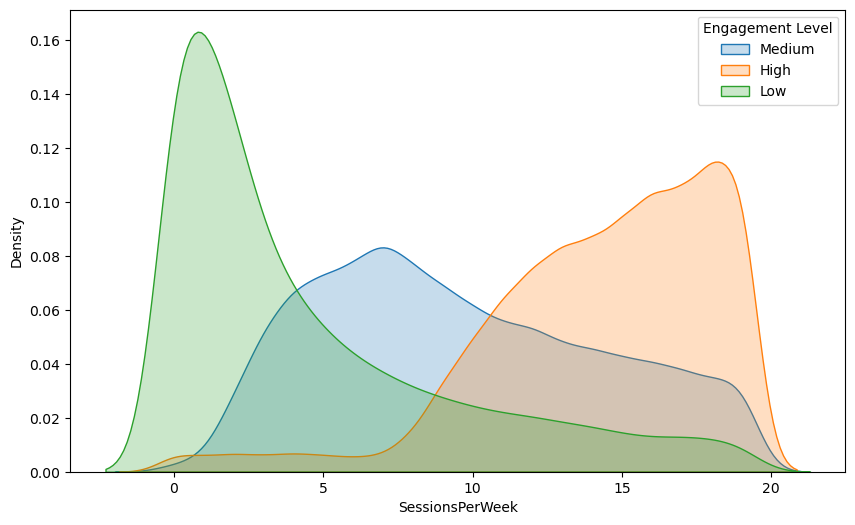

In [187]:
plt.figure(figsize=(10, 6))
for level in df['EngagementLevel'].unique():
    subset = df[df['EngagementLevel'] == level]
    sns.kdeplot(subset['SessionsPerWeek'], label=level, fill=True)

plt.legend(title='Engagement Level')

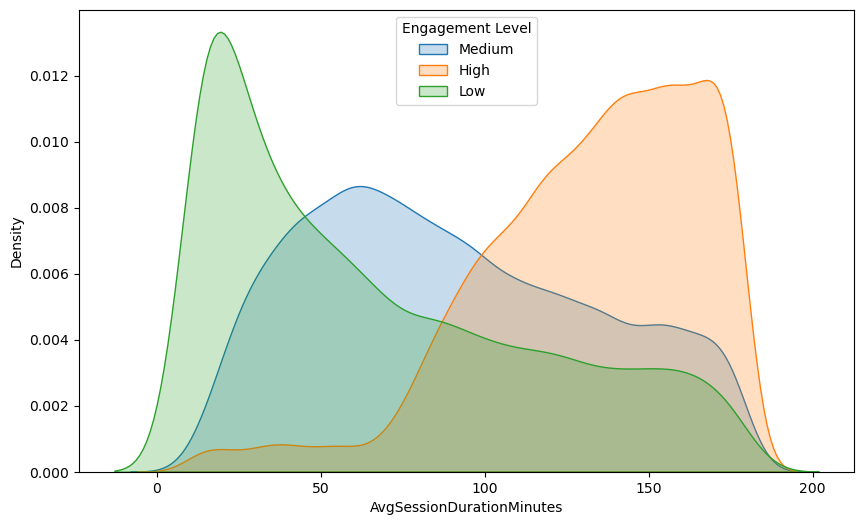

In [188]:
plt.figure(figsize=(10, 6))
for level in df['EngagementLevel'].unique():
    subset = df[df['EngagementLevel'] == level]
    sns.kdeplot(subset['AvgSessionDurationMinutes'], label=level, fill=True)

plt.legend(title='Engagement Level')

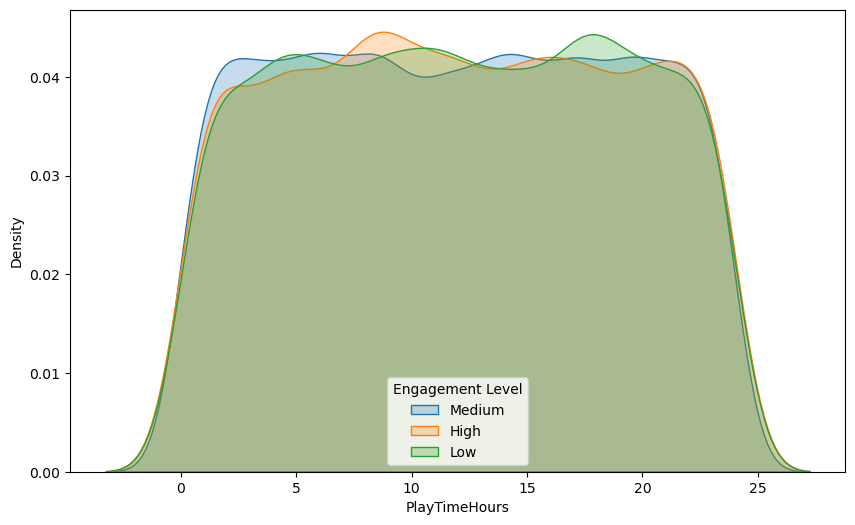

In [189]:
plt.figure(figsize=(10, 6))
for level in df['EngagementLevel'].unique():
    subset = df[df['EngagementLevel'] == level]
    sns.kdeplot(subset['PlayTimeHours'], label=level, fill=True)

plt.legend(title='Engagement Level')

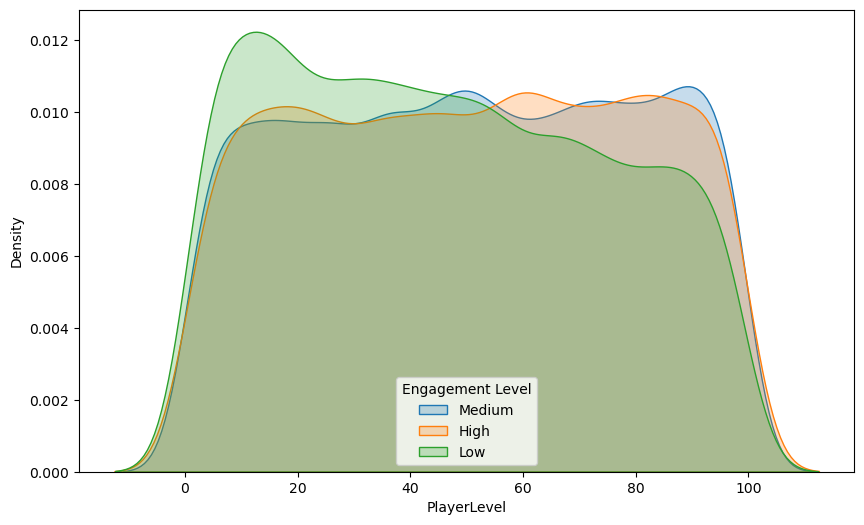

In [190]:
plt.figure(figsize=(10, 6))
for level in df['EngagementLevel'].unique():
    subset = df[df['EngagementLevel'] == level]
    sns.kdeplot(subset['PlayerLevel'], label=level, fill=True)

plt.legend(title='Engagement Level')

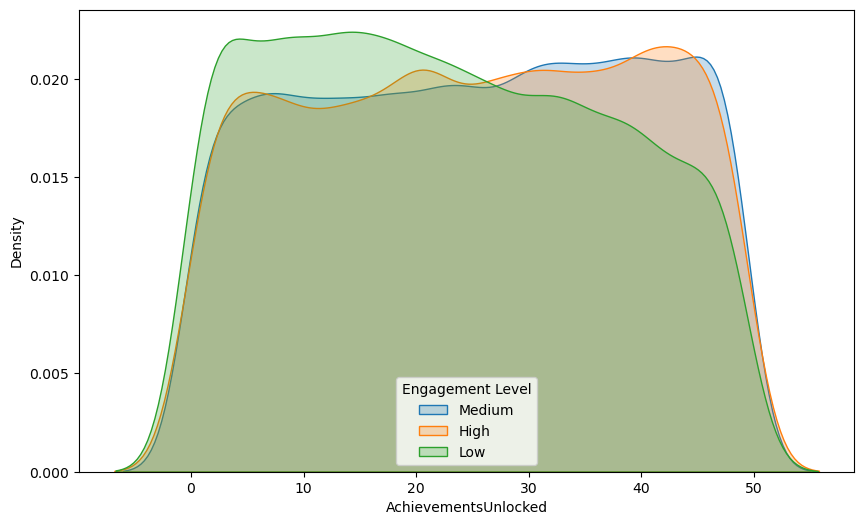

In [191]:
plt.figure(figsize=(10, 6))
for level in df['EngagementLevel'].unique():
    subset = df[df['EngagementLevel'] == level]
    sns.kdeplot(subset['AchievementsUnlocked'], label=level, fill=True)

plt.legend(title='Engagement Level')

In [192]:
# Generate the Hour playing per week 
df['MinutesPerWeek'] = df['AvgSessionDurationMinutes']*df['SessionsPerWeek']
df['HourPerWeek'] = df['MinutesPerWeek']/60

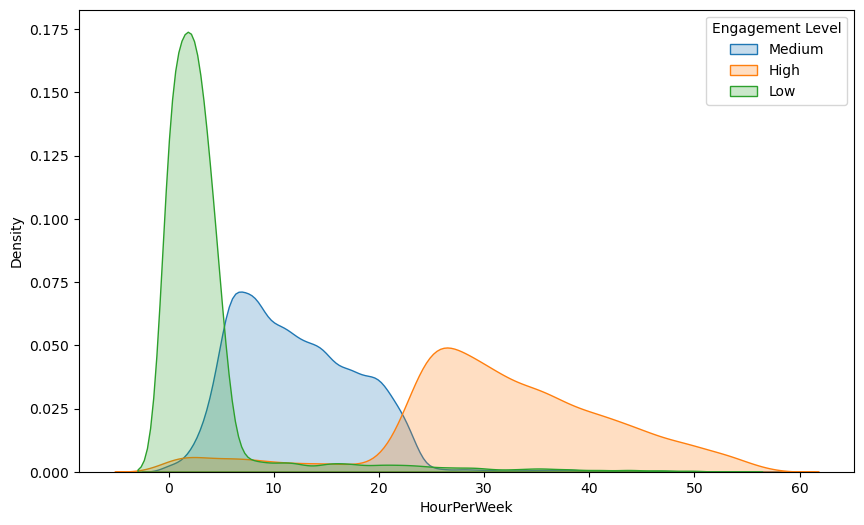

In [193]:
plt.figure(figsize=(10, 6))
for level in df['EngagementLevel'].unique():
    subset = df[df['EngagementLevel'] == level]
    sns.kdeplot(subset['HourPerWeek'], label=level, fill=True)

plt.legend(title='Engagement Level')

In [194]:
### K-means clustering

# Make sure 'PlayerID' is kept separately for merging later
player_ids = df[['PlayerID']]

# ========== (1) One-Hot Encoding ==========
df_encoded = pd.get_dummies(df, columns=['Gender', 'Location', 'GameGenre'])

# Convert all bool columns (created by get_dummies) to int
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)

# ========== (2) Label Encoding ==========
label_cols = ['GameDifficulty', 'EngagementLevel']

label_encoder = LabelEncoder()
for col in label_cols:
    df_encoded[col] = label_encoder.fit_transform(df[col])

# ========== (3) Select Numeric Columns Only ==========
# After encoding, all columns should now be numeric
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])

# ========== (4) Standardize Numeric Data ==========
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

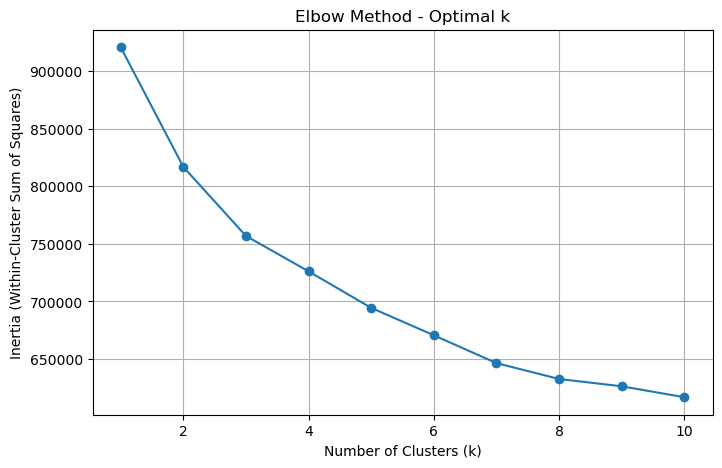

In [195]:

# === 6. Elbow Method to Find Optimal k ===
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method - Optimal k')
plt.grid(True)
plt.show()

In [196]:
# === 7. Fit Final KMeans Model (Choose k based on elbow plot — e.g., k=5) ===
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

In [197]:
# === 8. Attach Cluster Back to Original Data ===
# Combine PlayerID and Clusters into DataFrame
cluster_df = player_ids.copy()
cluster_df['Cluster'] = clusters

# Merge clusters back to original df
df_with_clusters = df.merge(cluster_df, on='PlayerID', how='left')

# === 9. Check Cluster Counts and Profiles ===
print("Cluster Sizes:")
print(df_with_clusters['Cluster'].value_counts())

print("\nCluster Profiles (Averages):")
print(df_with_clusters.groupby('Cluster').mean(numeric_only=True))

Cluster Sizes:
Cluster
0    12051
1     9126
2     9075
4     6135
3     3647
Name: count, dtype: int64

Cluster Profiles (Averages):
             PlayerID        Age  PlayTimeHours  InGamePurchases  \
Cluster                                                            
0        28967.190524  32.107709      11.995884         0.198656   
1        28984.328622  31.998466      12.069947         0.203704   
2        29030.406501  31.741708      11.897740         0.202314   
3        29053.725254  32.043872      12.018302         0.194955   
4        29118.515077  32.097963      12.203418         0.202282   

         SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
Cluster                                                            
0               7.646751                  81.209443    49.272260   
1              15.052926                 138.228906    50.745233   
2               7.703912                  80.463471    48.888154   
3               8.841514                  90.1584

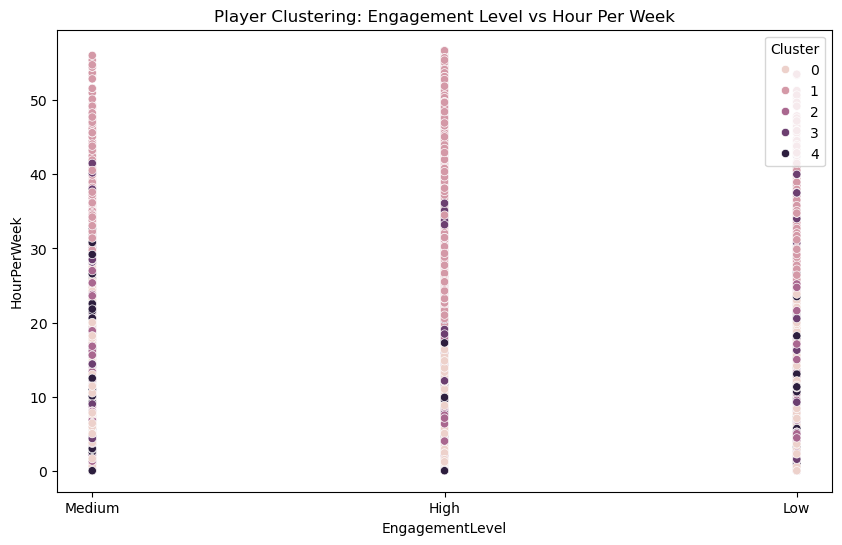

In [198]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_with_clusters, 
                x='EngagementLevel', 
                y='HourPerWeek', 
                hue='Cluster')

plt.title('Player Clustering: Engagement Level vs Hour Per Week')
plt.legend(title='Cluster')
plt.show()

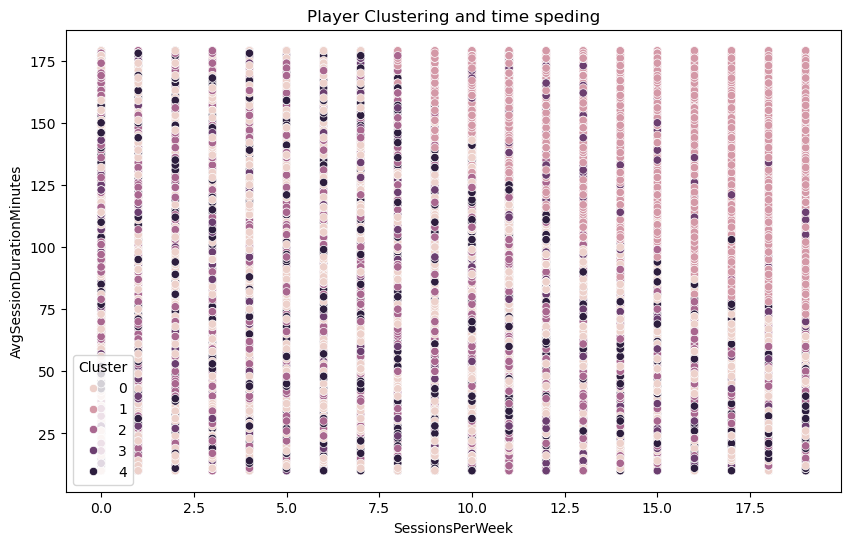

In [199]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_with_clusters, 
                x='SessionsPerWeek', 
                y='AvgSessionDurationMinutes', 
                hue='Cluster')

plt.title('Player Clustering and time speding')
plt.legend(title='Cluster')
plt.show()

In [200]:
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,MinutesPerWeek,HourPerWeek
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,648,10.800000
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,720,12.000000
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,2272,37.866667
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,765,12.750000
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,262,4.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium,300,5.000000
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High,2166,36.100000
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High,1760,29.333333
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium,384,6.400000


# Customize Target variable to incorporate both Activity Engagement and Monetary Engegement for business purpose

In [201]:
# Weight Score for the customize target variable
df['EngagementLevel'] = df['EngagementLevel'].map({'Low': 1, 'Medium': 2, 'High': 3})  # Encode EngagementLevel
df['PlayerValueScore'] = (0.7 * df['EngagementLevel']) + (0.3 * df['InGamePurchases'])


Text(0.5, 1.0, 'Distribution of PlayerValueScore')

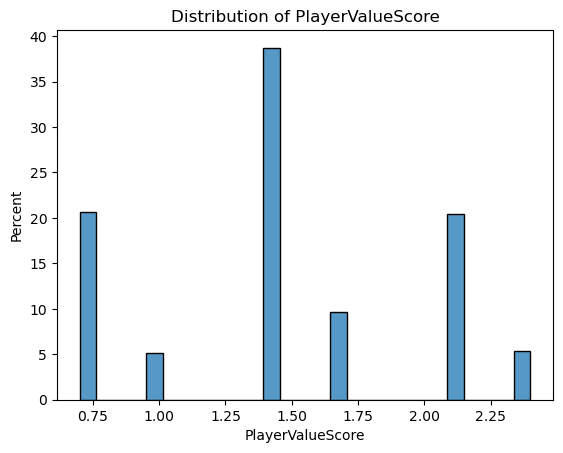

In [202]:
# Distribution of the Player Value Score
sns.histplot(df['PlayerValueScore'], stat='percent')
plt.title('Distribution of PlayerValueScore')

In [203]:
# Create ValueSegment based on percentiles:
df['ValueSegment'] = pd.qcut(df['PlayerValueScore'], 
                             q=[0, 0.25, 0.65, 1], 
                             labels=['Low Value', 'Medium Value', 'High Value'])

In [204]:
df['ValueSegment'].value_counts()

ValueSegment
Medium Value    19374
High Value      10336
Low Value       10324
Name: count, dtype: int64

In [205]:
# Crosstab of EngagementLevel with Game difficulty (each column sums to 100%)
ct_percentage = pd.crosstab(df['ValueSegment'], 
                             df['PlayerValueScore'], 
                             normalize='columns') * 100

print(ct_percentage)

PlayerValueScore    0.7    1.0    1.4    1.7    2.1    2.4
ValueSegment                                              
Low Value         100.0  100.0    0.0    0.0    0.0    0.0
Medium Value        0.0    0.0  100.0  100.0    0.0    0.0
High Value          0.0    0.0    0.0    0.0  100.0  100.0


# Modelling

In [206]:
# Encode ValueSegment into numerical labels
df['ValueSegment'] = df['ValueSegment'].map({'Low Value': 0, 'Medium Value': 1, 'High Value': 2})

# One-Hot Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Gender', 'Location', 'GameGenre'], drop_first=True)

# Label Encode ordinal features
label_cols = ['GameDifficulty']
for col in label_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Select Features (Drop unnecessary columns)
col_drop = ['PlayerID', 'PlayerValueScore', 'ValueSegment', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'EngagementLevel', 'MinutesPerWeek']
X = df_encoded.drop(columns=col_drop, errors='ignore')  
y = df_encoded['ValueSegment']  # Target variable

# Standardize Numeric Features (important for some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Random Forest model

In [207]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
#y_pred = rf_model.predict(X_test)

RandomForestClassifier(random_state=42)

🚀 In-Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8259
           1       1.00      1.00      1.00     15499
           2       1.00      1.00      1.00      8269

    accuracy                           1.00     32027
   macro avg       1.00      1.00      1.00     32027
weighted avg       1.00      1.00      1.00     32027


📊 Out-of-Sample Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2065
           1       0.92      0.96      0.94      3875
           2       0.93      0.89      0.91      2067

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.92      8007
weighted avg       0.92      0.92      0.92      8007



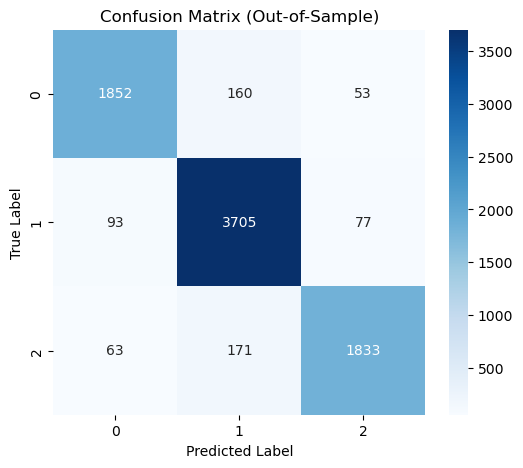

In [208]:
# In-sample predictions (training set)
y_train_pred = rf_model.predict(X_train)

# Out-of-sample predictions (test set)
y_test_pred = rf_model.predict(X_test)

# Classification report (In-sample & Out-of-sample)
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Print Classification Reports
print("🚀 In-Sample Classification Report:")
print(train_report)

print("\n📊 Out-of-Sample Classification Report:")
print(test_report)

# Confusion Matrix (Out-of-sample)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Out-of-Sample)")
plt.show()

In [209]:
# Set up a 10-fold cross-validation strategy
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the model using cross_val_score
scores = cross_val_score(rf_model, X_scaled, y, cv=kfold)

print("Cross-validation scores: ", scores)
print("Mean accuracy: %.2f%%" % (np.mean(scores) * 100))

Cross-validation scores:  [0.91733267 0.92107892 0.92057942 0.93381618 0.92630527 0.91356483
 0.92055958 0.92380714 0.92155883 0.93030227]
Mean accuracy: 92.29%


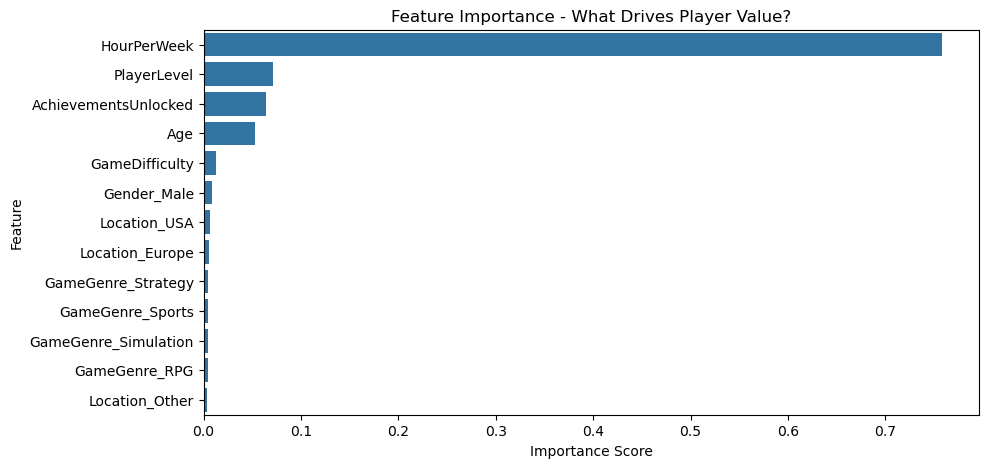

In [210]:
# Extract feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title('Feature Importance - What Drives Player Value?')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


XGBoost

In [211]:
xgb_model = XGBClassifier(
    objective='multi:softprob',  # Multi-class classification
    eval_metric='mlogloss',
    random_state=42
)

🚀 In-Sample Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8259
           1       0.94      0.97      0.96     15499
           2       0.95      0.91      0.93      8269

    accuracy                           0.94     32027
   macro avg       0.94      0.93      0.94     32027
weighted avg       0.94      0.94      0.94     32027


📊 Out-of-Sample Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2065
           1       0.93      0.96      0.94      3875
           2       0.94      0.90      0.92      2067

    accuracy                           0.93      8007
   macro avg       0.93      0.92      0.92      8007
weighted avg       0.93      0.93      0.93      8007



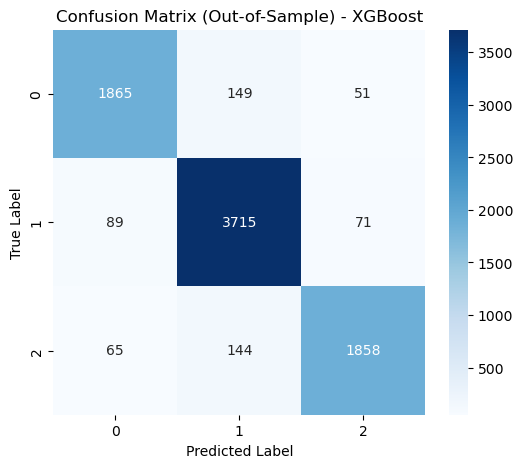

In [212]:
xgb_model.fit(X_train, y_train)

# In-sample predictions (training set)
y_train_pred_xgb = xgb_model.predict(X_train)

# Out-of-sample predictions (test set)
y_test_pred_xgb = xgb_model.predict(X_test)

# Classification report (In-sample & Out-of-sample)
train_report_xgb = classification_report(y_train, y_train_pred_xgb)
test_report_xgb = classification_report(y_test, y_test_pred_xgb)

# Print Classification Reports
print("🚀 In-Sample Classification Report (XGBoost):")
print(train_report_xgb)

print("\n📊 Out-of-Sample Classification Report (XGBoost):")
print(test_report_xgb)

# Confusion Matrix (Out-of-sample)
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Out-of-Sample) - XGBoost")
plt.show()

In [213]:
# Set up a 10-fold cross-validation strategy
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the model using cross_val_score
scores = cross_val_score(xgb_model, X_scaled, y, cv=kfold)

print("Cross-validation scores: ", scores)
print("Mean accuracy: %.2f%%" % (np.mean(scores) * 100))

Cross-validation scores:  [0.91808192 0.92807193 0.92432567 0.93906094 0.93180115 0.91606295
 0.92830377 0.92855358 0.92430677 0.93529853]
Mean accuracy: 92.74%


,Feature,Importance
4,HourPerWeek,0.595348
3,AchievementsUnlocked,0.066890
2,PlayerLevel,0.058672
1,GameDifficulty,0.029840
10,GameGenre_Simulation,0.029340
8,Location_USA,0.029184
5,Gender_Male,0.028637
9,GameGenre_RPG,0.028430
7,Location_Other,0.027540
0,Age,0.027241


/var/folders/4p/_7g_2gg13378l7_j__qx6pj80000gn/T/ipykernel_12207/2861349163.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Blues_r")


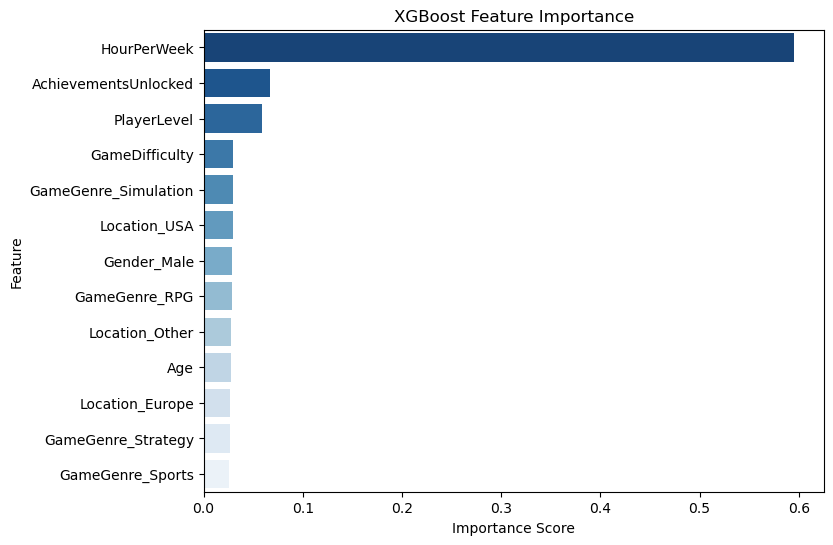

In [214]:
importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance table
from IPython.display import display
display(feature_importance_df)
#tools.display_dataframe_to_user(name="XGBoost Feature Importance", dataframe=feature_importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Blues_r")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.show()

In [218]:
# import numpy as np

# # Example new player (Age=25, Male, USA) with NO gameplay data
# new_player = pd.DataFrame([[25, label_encoders['Gender'].transform(['Male'])[0], 
#                             label_encoders['Location'].transform(['USA'])[0]]], 
#                           columns=['Age', 'Gender', 'Location'])

# # Simulate different GameGenres
# best_genre = None
# best_value_segment = -np.inf

# for genre in label_encoders['GameGenre'].classes_:
#     temp_player = new_player.copy()
#     temp_player['GameGenre'] = label_encoders['GameGenre'].transform([genre])[0]  # Encode genre
    
#     predicted_value = value_model.predict(temp_player)[0]  # Predict ValueSegment

#     if predicted_value > best_value_segment:
#         best_value_segment = predicted_value
#         best_genre = genre

# print(f"Recommended Game Genre: {best_genre}")
# print(f"Predicted ValueSegment: {label_encoders['ValueSegment'].inverse_transform([best_value_segment])[0]}")


In [216]:
# One-Hot Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Gender', 'Location', 'GameGenre'], drop_first=True)

# Label Encode ordinal features
label_cols = ['GameDifficulty']
for col in label_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Select Features (Drop unnecessary columns)
col_drop = ['PlayerID', 'PlayerValueScore', 'ValueSegment', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'EngagementLevel', 'MinutesPerWeek', 'HourPerWeek', 'AchievementUnlocked', 'PlayerLevel']
X = df_encoded.drop(columns=col_drop, errors='ignore')  
y = df_encoded['ValueSegment']  # Target variable

# Standardize Numeric Features (important for some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

🚀 In-Sample Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.69      0.21      0.32      8259
           1       0.54      0.95      0.69     15499
           2       0.70      0.20      0.31      8269

    accuracy                           0.57     32027
   macro avg       0.64      0.45      0.44     32027
weighted avg       0.62      0.57      0.50     32027


📊 Out-of-Sample Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.28      0.08      0.12      2065
           1       0.49      0.87      0.62      3875
           2       0.28      0.07      0.11      2067

    accuracy                           0.46      8007
   macro avg       0.35      0.34      0.29      8007
weighted avg       0.38      0.46      0.36      8007



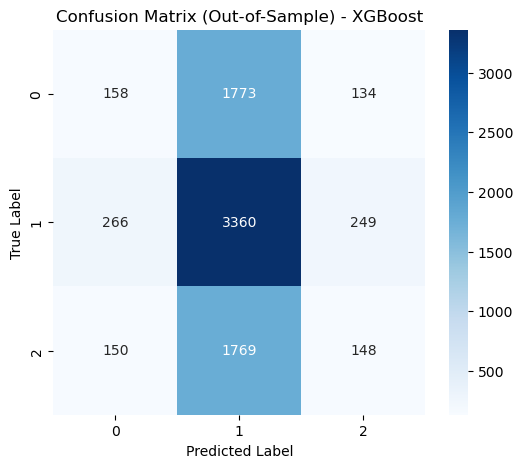

In [217]:
xgb_model.fit(X_train, y_train)

# In-sample predictions (training set)
y_train_pred_xgb = xgb_model.predict(X_train)

# Out-of-sample predictions (test set)
y_test_pred_xgb = xgb_model.predict(X_test)

# Classification report (In-sample & Out-of-sample)
train_report_xgb = classification_report(y_train, y_train_pred_xgb)
test_report_xgb = classification_report(y_test, y_test_pred_xgb)

# Print Classification Reports
print("🚀 In-Sample Classification Report (XGBoost):")
print(train_report_xgb)

print("\n📊 Out-of-Sample Classification Report (XGBoost):")
print(test_report_xgb)

# Confusion Matrix (Out-of-sample)
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Out-of-Sample) - XGBoost")
plt.show()